In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from ipywidgets import interact
from IPython.core.pylabtools import figsize
import daft
figsize(12.5, 4)

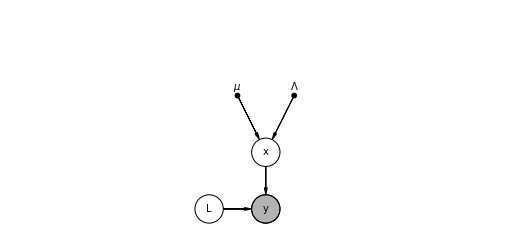

In [27]:
pgm = daft.PGM([9, 4], origin=[.5,.5])

pgm.add_node(daft.Node("L", "L", 4, 1.0))

pgm.add_node(daft.Node("mu", r"$\mu$", 4.5, 3,fixed=True))
pgm.add_node(daft.Node("Lambda", r"$\Lambda$", 5.5, 3,fixed=True))

pgm.add_node(daft.Node("x", "x", 5.0, 2.0))
pgm.add_node(daft.Node("y", "y", 5.0, 1.0, observed=True))


pgm.add_edge("L", "y")
pgm.add_edge("mu", "x")
pgm.add_edge("Lambda", "x")
pgm.add_edge("x", "y")

pgm.render()
plt.figure( figsize=(12,5) )
plt.show()

以下の式が与えられている

$p(\mathbf{x}) = N(\mathbf{x}|\mathbf{\mu},\Lambda^{-1})$

$p(\mathbf{y}|\mathbf{x}) = N(\mathbf{y}|A \mathbf{x} + \mathbf{b},L^{-1})$

この時、yの周辺分布とyが与えられた時のxの条件付き分布を求める

In [59]:
Sigma = (Lambda_inverse ** -1 +A * L_inverse**-1 *A)**-1

x_dist= norm(mu,Lambda_inverse)
y_dist= norm(A * mu +b,L_inverse + A* Lambda_inverse *A)

def y_conditionated_x_dist(x):
    return norm(A*x+b,L_inverse)

def x_conditionated_y_dist(y):
    return  norm(Sigma*(A * L_inverse**-1 * (y-b) + A*mu),Sigma)

# p(y),p(y|x)の描画

yの周辺分布p(y)とxが与えられた時のyの条件付き分布p(y|x)が次式の場合

$p(\mathbf{y}) =  N(\mathbf{y}|A \mathbf{\mu} + \mathbf{b},L^{-1} + A \Lambda^{-1} A^{T})$

$p(\mathbf{y}|\mathbf{x}) = N(\mathbf{y}|A \mathbf{x} + \mathbf{b},L^{-1})$

In [61]:
y = np.linspace(-10,10,500)
@interact(x=(-10, 10 ,0.1))
def plot_distribution(x):
    plt.plot(y,y_dist.pdf(y),label='p(y)')
    plt.plot(y,y_conditionated_x_dist(x).pdf(y),label = 'p(y|x)')
    plt.legend()
    plt.show()


# p(x),p(x|y) の描画

xの周辺分布とyが与えられた時のxの条件付き分布は次式

$p(\mathbf{x}) = N(\mathbf{x}|\mathbf{\mu},\Lambda^{-1})$

$p(\mathbf{x}|\mathbf{y}) =  N( \Sigma\{\mathbf{x}|A^{T} L (\mathbf{y}-\mathbf{b}) + \Lambda  \mathbf{\mu}\},\Sigma)$

$\Sigma = (\Lambda + A^{T}LA)^{-1}$

In [42]:
x = np.linspace(-10,10,500)
@interact(y=(-10, 10,0.1))
def plot_distribution(y):
    plt.plot(x,x_dist.pdf(x),label='p(x)')
    plt.plot(x,x_conditionated_y_dist(y).pdf(x),label = 'p(x|y)')
    plt.legend()
    plt.show()


## p(x,y)の描画

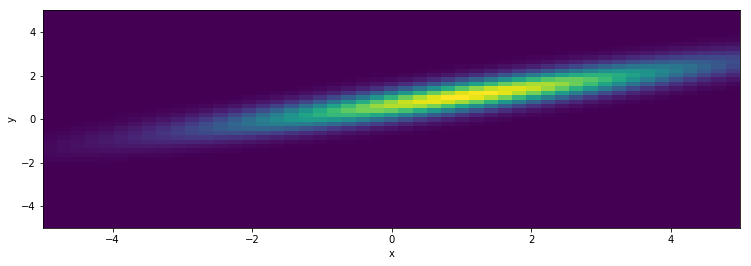

In [45]:
x_list =  np.linspace(-5,5,50)
y_list =  np.linspace(-5,5,50)

z = []
for x in x_list:
    for y in y_list:
        z.append(x_conditionated_y_dist(y).pdf(x)*x_dist.pdf(x))

plt.pcolor(x_list,y_list,np.array(z).reshape([len(x_list),len(y_list)]))
plt.xlabel('x')
plt.ylabel('y')